In [ ]:
from numpy.random      import randn
from pandas            import DataFrame
from seaborn           import heatmap
from matplotlib.pyplot import show
from itertools         import combinations

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('df/6_clear_normalised.csv')

FileNotFoundError: [Errno 2] No such file or directory: '6_clear_normalised.csv'

In [ ]:
df.corr()

,raw_value,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,HBondAcceptorCount,RotatableBondCount,IsotopeAtomCount,AtomStereoCount,DefinedAtomStereoCount,UndefinedAtomStereoCount,BondStereoCount,DefinedBondStereoCount,UndefinedBondStereoCount,CovalentUnitCount
raw_value,1.000000,0.117766,0.111446,0.031308,0.098157,0.112567,-0.045538,-0.051497,0.112567,-0.054782,...,0.114296,0.087999,0.094123,0.155631,0.105831,0.089568,0.035999,0.081913,0.040975,-0.053905
ABC,0.117766,1.000000,0.992633,0.391927,0.530972,0.948269,0.367226,0.362125,0.948269,0.246412,...,0.857628,0.773834,0.271223,0.790665,0.744923,0.134274,0.079289,0.066369,0.028337,-0.031017
ABCGG,0.111446,0.992633,1.000000,0.382393,0.539020,0.936671,0.408423,0.404064,0.936671,0.272933,...,0.848519,0.777170,0.275647,0.791649,0.738870,0.152249,0.075501,0.064499,0.026717,-0.027293
nAcid,0.031308,0.391927,0.382393,1.000000,0.245362,0.432294,0.141880,0.143478,0.432294,0.067924,...,0.415927,0.418619,0.293036,0.327052,0.348263,0.009976,-0.041061,-0.039398,0.477485,-0.040101
nBase,0.098157,0.530972,0.539020,0.245362,1.000000,0.507879,0.141793,0.139937,0.507879,0.101005,...,0.398940,0.613851,0.416076,0.359121,0.290757,0.013250,-0.035246,-0.016734,0.222263,-0.030314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UndefinedAtomStereoCount,0.089568,0.134274,0.152249,0.009976,0.013250,0.124664,0.124169,0.122674,0.124664,0.076007,...,0.188148,0.055855,-0.018535,0.271069,-0.008168,1.000000,-0.017114,-0.021533,-0.077325,-0.019608
BondStereoCount,0.035999,0.079289,0.075501,-0.041061,-0.035246,0.071531,0.081399,0.079419,0.071531,0.065753,...,0.007167,0.024245,-0.012202,0.000421,0.007125,-0.017114,1.000000,0.783175,-0.001003,-0.015154
DefinedBondStereoCount,0.081913,0.066369,0.064499,-0.039398,-0.016734,0.064562,0.026784,0.027995,0.064562,0.012452,...,0.044781,0.009504,-0.016321,-0.005753,0.002596,-0.021533,0.783175,1.000000,-0.064879,-0.018035
UndefinedBondStereoCount,0.040975,0.028337,0.026717,0.477485,0.222263,0.157718,-0.005812,-0.000377,0.157718,0.016456,...,-0.067799,0.315600,0.315640,-0.038155,-0.023326,-0.077325,-0.001003,-0.064879,1.000000,0.014375


In [4]:
def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

In [5]:
corrDf = df.corr(method='spearman').abs()

NameError: name 'df' is not defined

In [12]:
upper_tri = corrDf.where(np.triu(np.ones(corrDf.shape),k=1) != 0)

In [13]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.4)]
print(to_drop)

['ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nSpiro', 'nBridgehead', 'nHetero', 'nH', 'nB', 'nC', 'nN', 'nO', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'nX', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'AT

In [14]:
df1 = df.drop(to_drop, axis=1)

In [15]:
corrDf = df1.corr()

In [16]:
corrDf

,raw_value,ABC,nAcid,ATSC3c,ATSC3dv,ATSC5dv,BCUTdv-1l
raw_value,1.000000,0.117766,0.031308,0.065133,-0.010114,-0.035457,-0.039370
ABC,0.117766,1.000000,0.391927,0.241063,-0.457910,0.101624,-0.034403
nAcid,0.031308,0.391927,1.000000,-0.217834,-0.323686,-0.071713,-0.050076
ATSC3c,0.065133,0.241063,-0.217834,1.000000,0.303669,0.573191,0.019735
ATSC3dv,-0.010114,-0.457910,-0.323686,0.303669,1.000000,0.147124,0.073541
ATSC5dv,-0.035457,0.101624,-0.071713,0.573191,0.147124,1.000000,-0.018986
BCUTdv-1l,-0.039370,-0.034403,-0.050076,0.019735,0.073541,-0.018986,1.000000


In [17]:
import seaborn as sns

In [20]:
corrDf

,raw_value,ABC,nAcid,ATSC3c,ATSC3dv,ATSC5dv,BCUTdv-1l
raw_value,1.000000,0.117766,0.031308,0.065133,-0.010114,-0.035457,-0.039370
ABC,0.117766,1.000000,0.391927,0.241063,-0.457910,0.101624,-0.034403
nAcid,0.031308,0.391927,1.000000,-0.217834,-0.323686,-0.071713,-0.050076
ATSC3c,0.065133,0.241063,-0.217834,1.000000,0.303669,0.573191,0.019735
ATSC3dv,-0.010114,-0.457910,-0.323686,0.303669,1.000000,0.147124,0.073541
ATSC5dv,-0.035457,0.101624,-0.071713,0.573191,0.147124,1.000000,-0.018986
BCUTdv-1l,-0.039370,-0.034403,-0.050076,0.019735,0.073541,-0.018986,1.000000


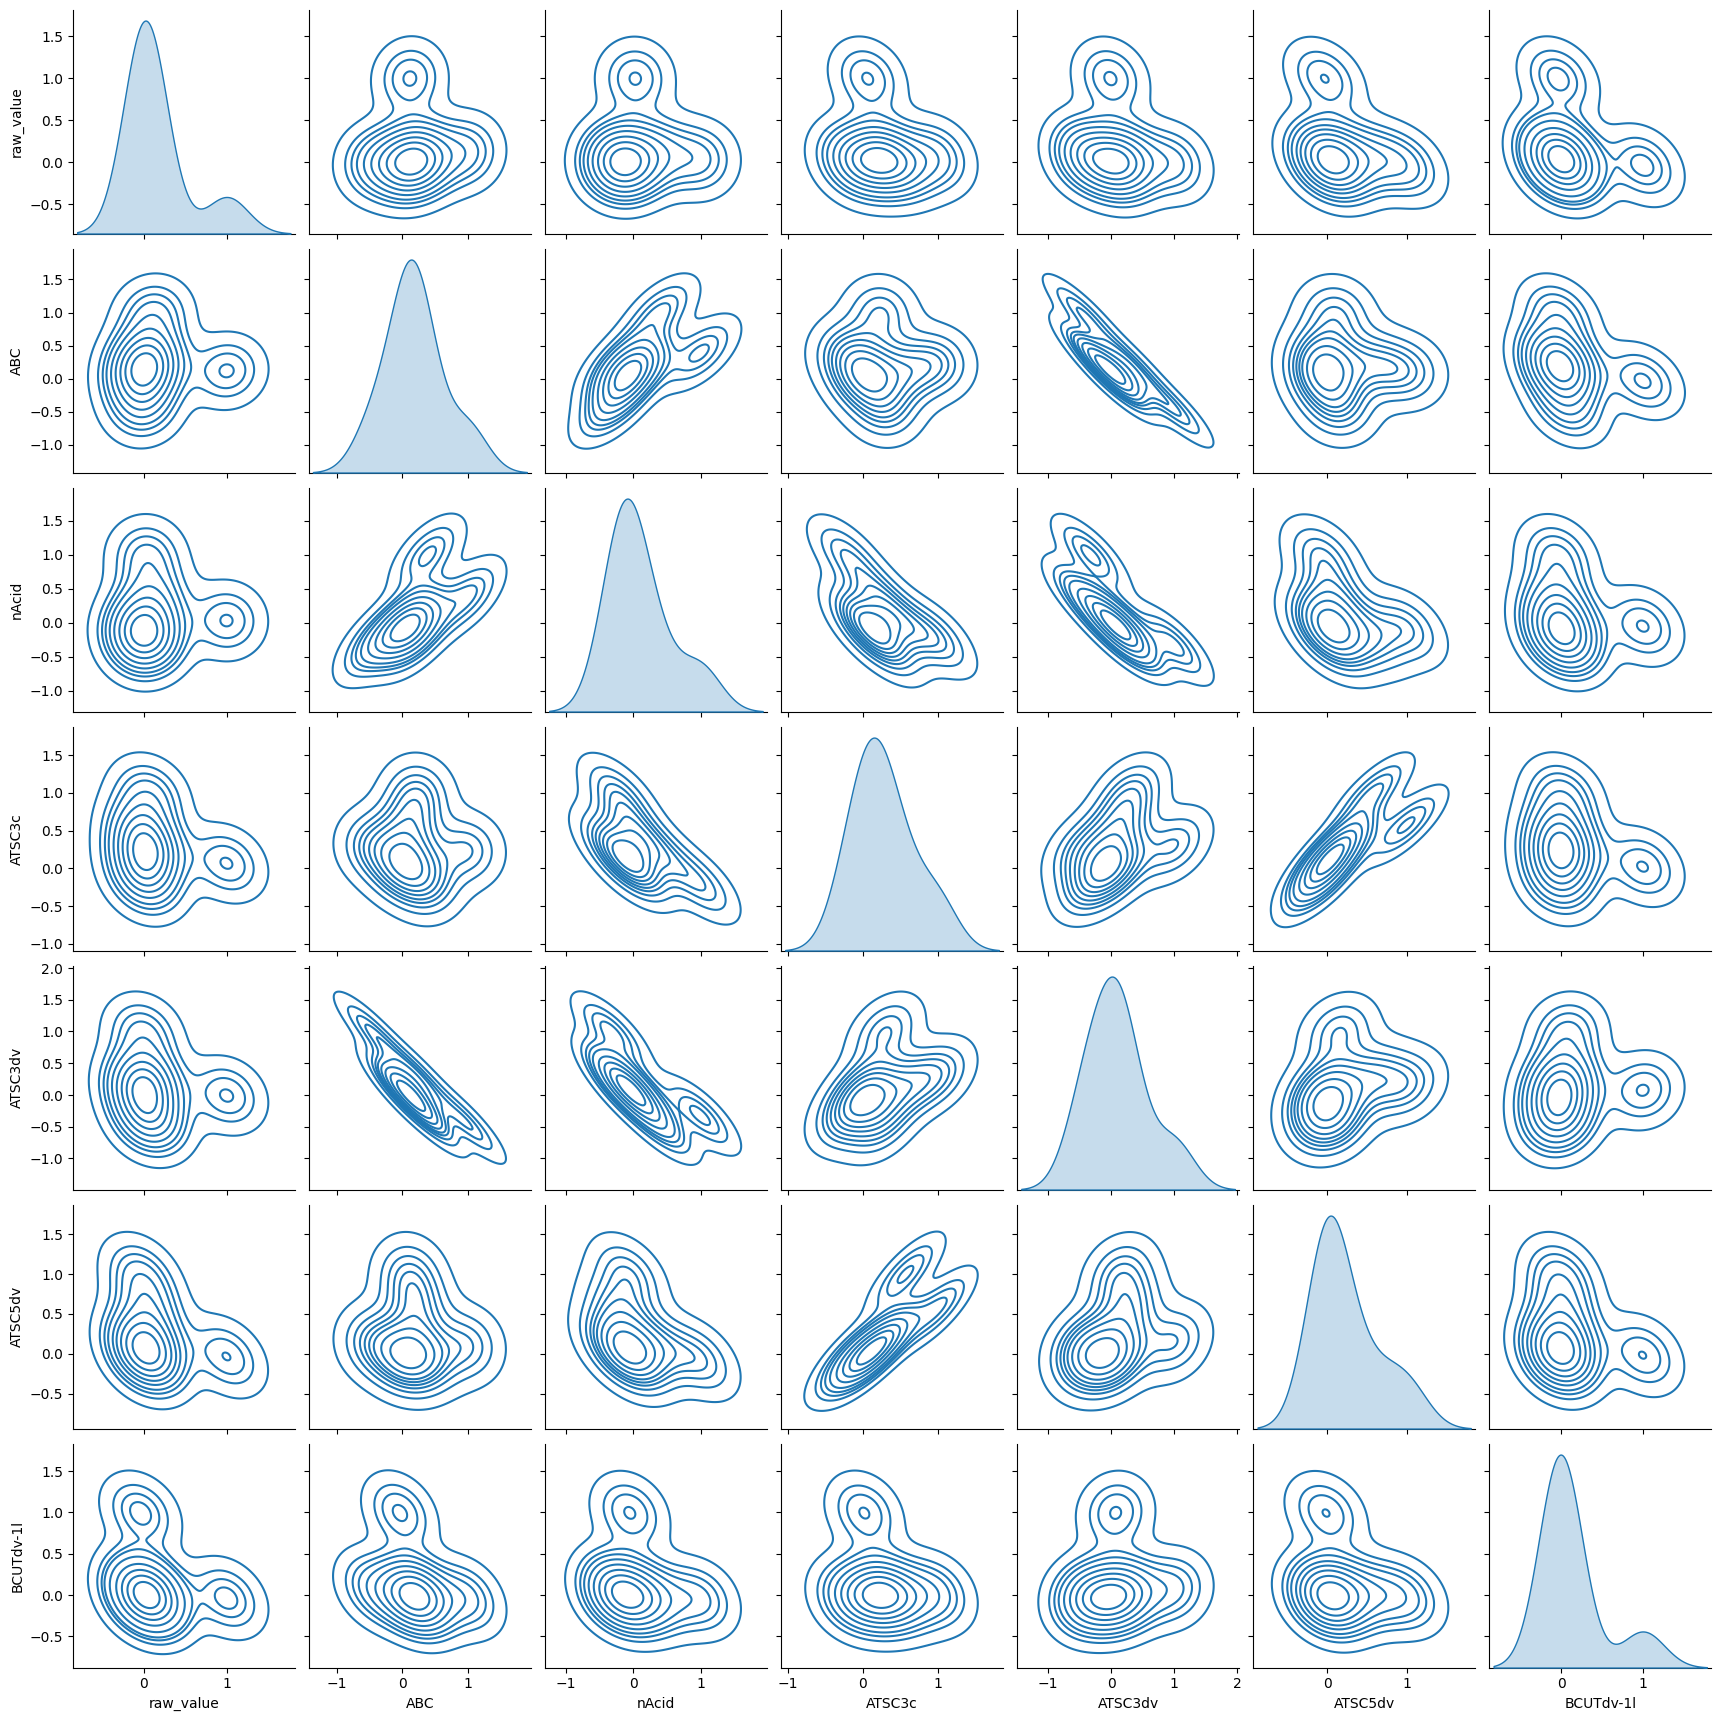

In [18]:
sns.pairplot(corrDf, kind='kde')

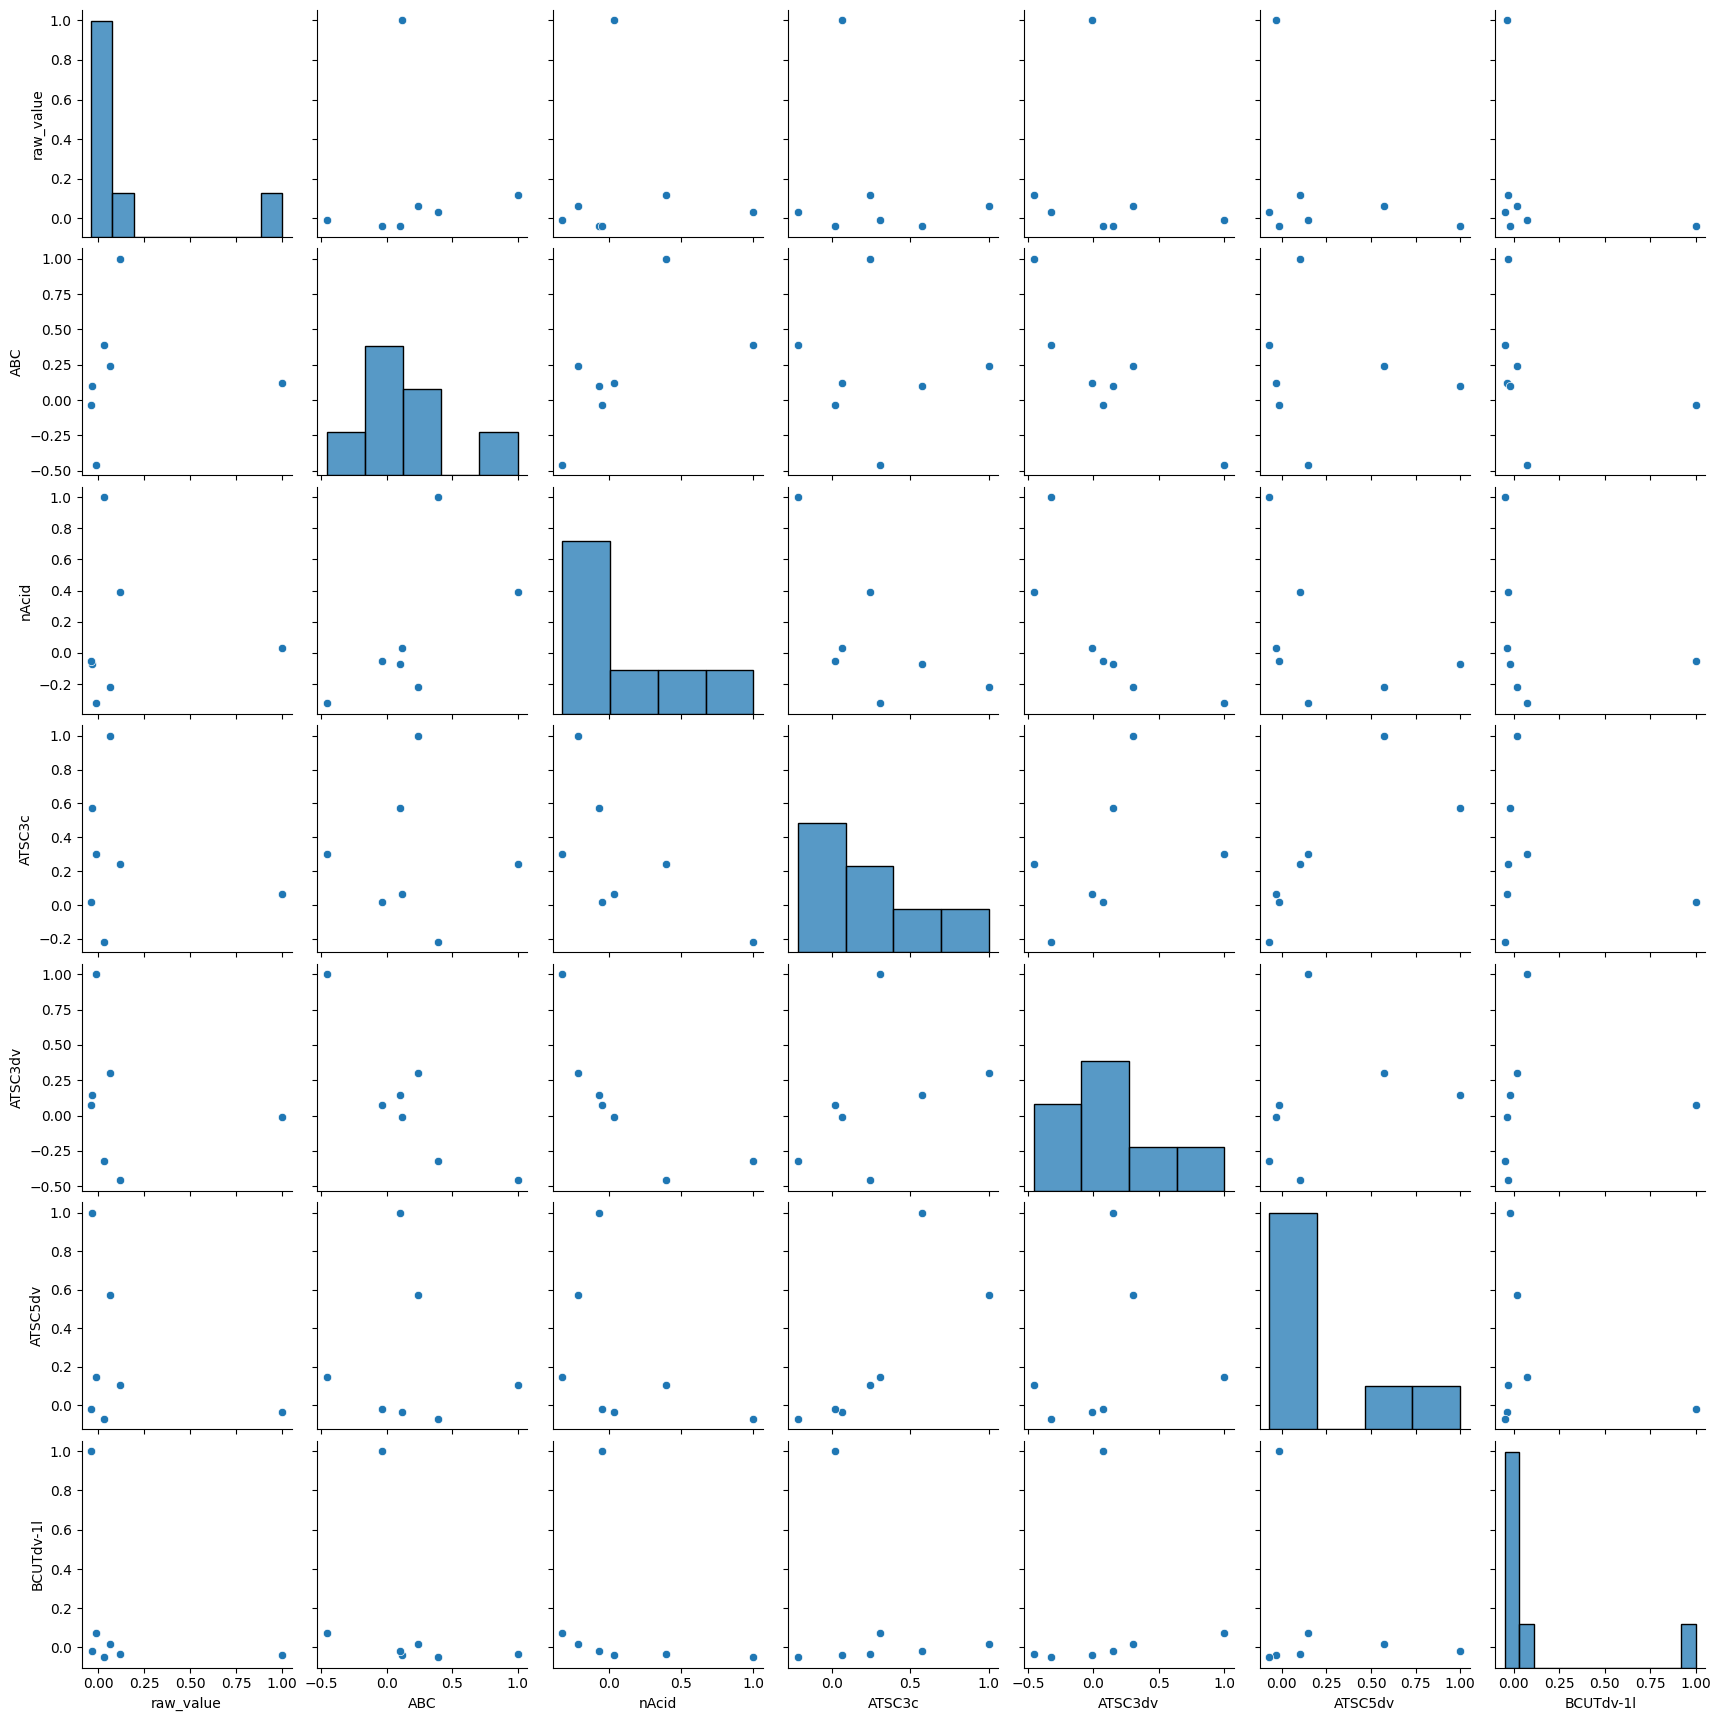

In [19]:
sns.pairplot(corrDf)

array([[<AxesSubplot: xlabel='raw_value', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ABC', ylabel='raw_value'>,
        <AxesSubplot: xlabel='nAcid', ylabel='raw_value'>,
        <AxesSubplot: xlabel='nBase', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC3c', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC6c', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC3dv', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC4dv', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC5dv', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC6dv', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC8dv', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC2d', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC5d', ylabel='raw_value'>,
        <AxesSubplot: xlabel='ATSC1Z', ylabel='raw_value'>,
        <AxesSubplot: xlabel='BCUTdv-1l', ylabel='raw_value'>,
        <AxesSubplot: xlabel='TopoShapeIndex', ylabel='raw_value'>,
        <AxesSubplot: xlab

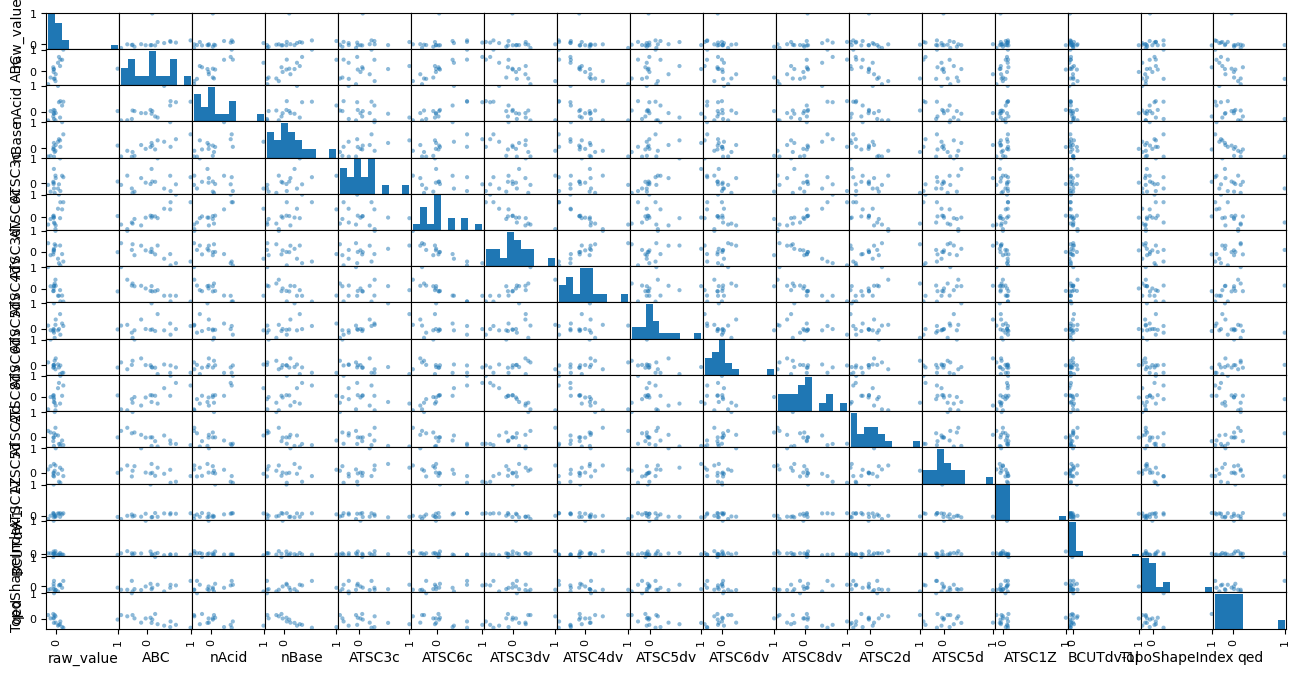

In [124]:
from pandas.plotting import scatter_matrix
features = corrDf.columns
scatter_matrix(corrDf, figsize=(16, 8))

In [102]:
corrDf

,raw_value,ABC,nAcid,nBase,SpMax_A,SpMAD_A,nAromAtom,nSpiro,nHetero,nN,...,TopoShapeIndex,MinAbsEStateIndex,qed,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,Kappa3,PEOE_VSA14,SMR_VSA10,XLogP
raw_value,1.000000,0.117766,0.031308,0.098157,-0.045538,-0.054782,0.078109,0.025910,0.130194,0.127208,...,-0.045206,-0.064045,-0.033724,0.057099,0.019936,-0.069683,-0.012322,0.066645,0.126857,0.091071
ABC,0.117766,1.000000,0.391927,0.530972,0.367226,0.246412,0.709542,0.072346,0.906427,0.883041,...,0.184178,-0.182097,-0.353012,-0.009507,-0.085679,-0.361356,-0.015771,0.209345,0.691035,0.231781
nAcid,0.031308,0.391927,1.000000,0.245362,0.141880,0.067924,0.230685,-0.032400,0.596785,0.341995,...,-0.176015,-0.081015,-0.272510,0.356965,-0.227785,-0.162318,0.171474,0.512596,0.423638,0.322590
nBase,0.098157,0.530972,0.245362,1.000000,0.141793,0.101005,0.151515,0.003194,0.535984,0.608617,...,-0.050307,-0.134816,-0.327971,0.052311,-0.106143,-0.189156,-0.013458,0.259155,0.391447,0.367068
SpMax_A,-0.045538,0.367226,0.141880,0.141793,1.000000,0.880362,0.362877,0.143774,0.253681,0.197196,...,0.263785,-0.112550,0.102733,0.129062,-0.300402,-0.214060,0.011340,0.048661,0.190560,0.048122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FpDensityMorgan1,-0.069683,-0.361356,-0.162318,-0.189156,-0.214060,-0.145443,-0.306595,-0.054178,-0.296662,-0.201647,...,0.112521,0.023359,0.210390,-0.160100,0.077192,1.000000,-0.025872,-0.196112,-0.288953,-0.215262
Kappa3,-0.012322,-0.015771,0.171474,-0.013458,0.011340,0.004200,-0.032550,-0.005796,0.033768,-0.016248,...,-0.078095,0.076216,-0.072370,0.078615,-0.021074,-0.025872,1.000000,0.024665,0.034966,0.044636
PEOE_VSA14,0.066645,0.209345,0.512596,0.259155,0.048661,0.043871,0.031178,-0.008051,0.464501,0.082710,...,-0.231118,-0.053005,-0.197982,0.284672,-0.113122,-0.196112,0.024665,1.000000,0.491207,0.659981
SMR_VSA10,0.126857,0.691035,0.423638,0.391447,0.190560,0.117787,0.486600,0.103500,0.749668,0.650557,...,-0.039071,-0.139164,-0.329772,0.124862,-0.065581,-0.288953,0.034966,0.491207,1.000000,0.484744


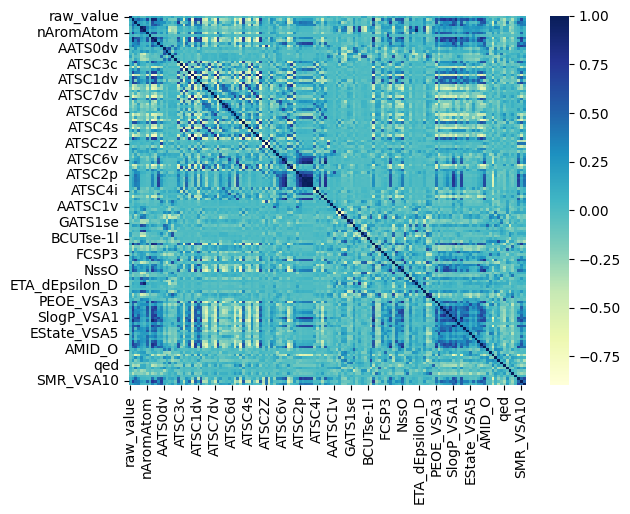

In [104]:
heatmap(corrDf,cmap="YlGnBu")
show()

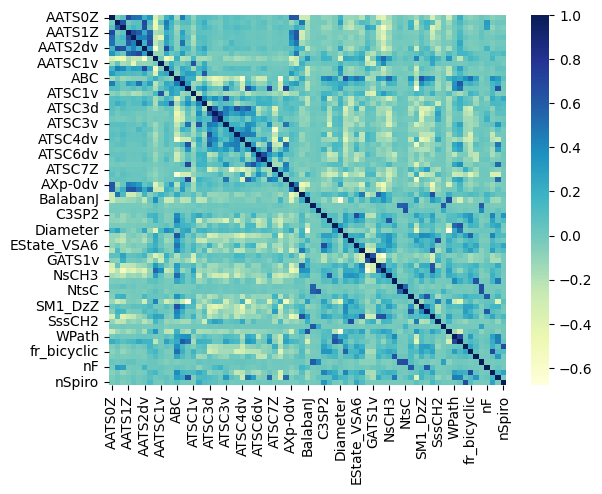

In [50]:
#heatmap(corrDf,cmap="YlGnBu")
heatmap(absHighPass(corrDf,0.6),cmap="YlGnBu")
show()